In [ ]:
# Loading Libraries:

import pandas as pd 
import numpy as np 
import sklearn as sk 
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from geopy.geocoders import Nominatim
import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from prophet import Prophet

In [3]:
pd.set_option('display.max_columns', 50) 

In [5]:
leases = pd.read_csv('/Users/samreade/Desktop/DATA_FEST/2025 Data Files/Leases.csv')

In [105]:
PAAD = pd.read_csv('/Users/samreade/Desktop/DATA_FEST/2025 Data Files/Price and Availability Data.csv')

In [106]:
Unploy = pd.read_csv('/Users/samreade/Desktop/DATA_FEST/2025 Data Files/Unemployment.csv')

In [107]:
MMOD = pd.read_csv('/Users/samreade/Desktop/DATA_FEST/2025 Data Files/Major Market Occupancy Data-revised.csv')

In [7]:
leases.head() 

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,zip,internal_submarket,internal_class,leasedSF,company_name,internal_industry,transaction_type,internal_market_cluster,costarID,space_type,CBD_suburban,RBA,available_space,availability_proportion,internal_class_rent,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
0,2018,Q1,1.0,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,30328.0,Central Perimeter,A,24736.0,Capital Investment Advisors,Financial Services and Insurance,Expansion,NaN,445509,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
1,2018,Q1,1.0,Atlanta,100 City View,Atlanta_Northwest_Atlanta_100 City View_3330 C...,3330 Cumberland Blvd,South,Atlanta,GA,30339.0,Northwest,A,965.0,NaN,NaN,New,NaN,436994,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
2,2018,Q1,1.0,Atlanta,1000 Parkwood,Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...,1000 Parkwood Cir SE,South,Atlanta,GA,30339.0,Northwest,A,2215.0,Efc Moen,NaN,New,NaN,434890,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
3,2018,Q1,1.0,Atlanta,1100 Circle 75,Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...,1100 Circle 75 Pky SE,South,Atlanta,GA,30339.0,Northwest,O,1925.0,NaN,NaN,New,NaN,434720,Relet,Suburban,65810449.0,12728989.0,0.193419,18.560886,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742.0
4,2018,Q1,1.0,Atlanta,1200 Ashwood,Atlanta_Central Perimeter_Atlanta_1200 Ashwood...,1200 Ashwood Pky,South,Atlanta,GA,30338.0,Central Perimeter,A,2404.0,NaN,NaN,New,NaN,437562,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0


In [9]:
leases.shape

(194685, 35)

In [11]:
leases.isna().sum()

year                                   0
quarter                                0
monthsigned                          863
market                                 0
building_name                      36686
building_id                            0
address                                0
region                                 0
city                                   0
state                                  0
zip                                    1
internal_submarket                     0
internal_class                         9
leasedSF                               0
company_name                      157469
internal_industry                 168284
transaction_type                     539
internal_market_cluster           118847
costarID                               0
space_type                          7545
CBD_suburban                           0
RBA                                49144
available_space                    49144
availability_proportion            49144
internal_class_r

In [111]:
Unploy.head()

,year,quarter,month,state,unemployment_rate
0,2018,Q1,1,AZ,4.9
1,2018,Q1,1,CA,4.4
2,2018,Q1,1,CO,2.9
3,2018,Q1,1,DE,4.1
4,2018,Q1,1,DC,5.9


In [112]:
Unploy.shape

(1848, 5)

In [459]:
MMOD.head()

,year,quarter,market,ending_occupancy_proportion,starting_occupancy_proportion,avg_occupancy_proportion
0,2020,Q1,Washington D.C.,0.19,0.98,0.785714
1,2020,Q1,Manhattan,0.08,0.98,0.732857
2,2020,Q1,Chicago,0.14,0.99,0.788571
3,2020,Q1,Houston,0.33,0.99,0.835714
4,2020,Q1,Philadelphia,0.20,0.99,0.817143


In [114]:
MMOD.shape 

(190, 6)

In [115]:
PAAD.head()

,year,quarter,market,internal_class,RBA,available_space,availability_proportion,internal_class_rent,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
0,2018,Q1,Atlanta,A,101140416,20239067,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126
1,2018,Q1,Atlanta,O,65810449,12728989,0.193419,18.560886,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742
2,2018,Q1,Austin,A,36815073,4281986,0.116311,40.384706,36.596618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1738905
3,2018,Q1,Austin,O,27947525,3360936,0.121082,30.118658,36.596618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185674
4,2018,Q1,Baltimore,A,41033288,6813380,0.166045,27.104835,22.954034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380750


In [116]:
PAAD.shape

(1680, 18)

In [159]:
leases['region'].unique()    

array(['South', 'Northeast', 'Midwest/Central', 'West'], dtype=object)

In [191]:
good_leases = leases[['year', 'market', 'overall_rent', 'leasing', 'available_space']]
good_leases = good_leases.dropna()
good_leases.head() 

,year,market,overall_rent,leasing,available_space
0,2018,Atlanta,24.345689,1205126.0,20239067.0
1,2018,Atlanta,24.345689,1205126.0,20239067.0
2,2018,Atlanta,24.345689,1205126.0,20239067.0
3,2018,Atlanta,24.345689,715742.0,12728989.0
4,2018,Atlanta,24.345689,1205126.0,20239067.0


In [193]:
good_leases.shape

(145541, 5)

In [195]:
good_leases.isna().sum()

year               0
market             0
overall_rent       0
leasing            0
available_space    0
dtype: int64

In [167]:

# Step 1: Group by market and year, then count entries
market_year_counts = (
    good_leases
    .groupby(['market', 'year'])
    .size()
    .reset_index(name='count')
)

# Step 2: Sort by market and year
market_year_counts = market_year_counts.sort_values(by=['market', 'year'])

# Step 3: Calculate net change per market
# Get the first and last year for each market
first_year_counts = market_year_counts.groupby('market').first().reset_index()
last_year_counts = market_year_counts.groupby('market').last().reset_index()

# Merge to compute net change
net_change = pd.merge(
    first_year_counts[['market', 'count']],
    last_year_counts[['market', 'count']],
    on='market',
    suffixes=('_first', '_last')
)

# Calculate net change
net_change['net_change'] = net_change['count_last'] - net_change['count_first']

# Sort markets by net change
net_change = net_change.sort_values(by='net_change', ascending=False)

# Display top 5 markets with highest gains and losses
print("Top Gaining Markets:")
print(net_change.head(5))

print("\nTop Losing Markets:")
print(net_change.tail(5))

Top Gaining Markets:
                 market  count_first  count_last  net_change
25        South Florida         1673        1792         119
6       Chicago Suburbs          891         968          77
14  Northern New Jersey          674         749          75
13            Nashville          331         404          73
20       Salt Lake City          246         298          52

Top Losing Markets:
                market  count_first  count_last  net_change
11         Los Angeles         2571        2243        -328
24  South Bay/San Jose          782         452        -330
3               Boston         1513        1019        -494
7      Dallas/Ft Worth         2658        2018        -640
10             Houston         2803        1949        -854


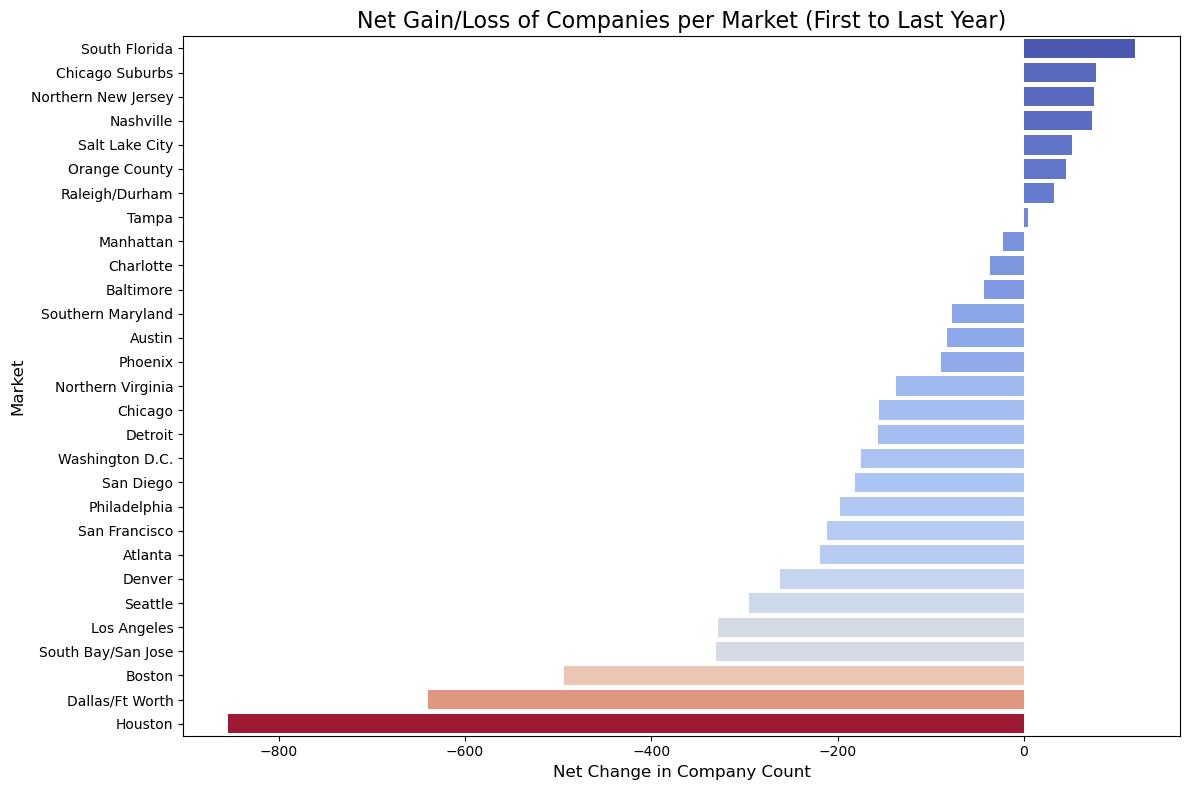

In [216]:

plt.figure(figsize=(12, 8))

sns.barplot(x='net_change', y='market', data=net_change, hue='net_change', palette='coolwarm_r', dodge=False)

plt.title('Net Gain/Loss of Companies per Market (First to Last Year)', fontsize=16)
plt.xlabel('Net Change in Company Count', fontsize=12)
plt.ylabel('Market', fontsize=12)

plt.legend().set_visible(False)

plt.tight_layout()
plt.show()


In [224]:
glease = leases[['year', 'market', 'overall_rent']]
glease.head() 

,year,market,overall_rent
0,2018,Atlanta,24.345689
1,2018,Atlanta,24.345689
2,2018,Atlanta,24.345689
3,2018,Atlanta,24.345689
4,2018,Atlanta,24.345689


In [232]:
glease = glease.dropna(subset=['overall_rent']) 

In [240]:
unique_values = glease['market'].unique()

print(unique_values)


['Atlanta' 'Austin' 'Baltimore' 'Boston' 'Charlotte' 'Chicago Suburbs'
 'Detroit' 'Houston' 'Los Angeles' 'Manhattan' 'Nashville'
 'Northern New Jersey' 'Northern Virginia' 'Philadelphia' 'Phoenix'
 'Salt Lake City' 'San Diego' 'San Francisco' 'Seattle' 'South Florida'
 'Tampa']


In [234]:
glease.shape

(145541, 3)

In [236]:
glease.isna().sum() 

year            0
market          0
overall_rent    0
dtype: int64

In [310]:

market_year_counts = (
    glease
    .groupby(['market', 'year'])
    .size()
    .reset_index(name='count')
)

market_year_counts = market_year_counts.sort_values(by=['market', 'year'])

first_year_counts = market_year_counts.groupby('market').first().reset_index()
last_year_counts = market_year_counts.groupby('market').last().reset_index()

net_change2 = pd.merge(
    first_year_counts[['market', 'count']],
    last_year_counts[['market', 'count']],
    on='market',
    suffixes=('_first', '_last')
)

net_change2['net_change2'] = net_change2['count_last'] - net_change2['count_first']

net_change2 = net_change2.sort_values(by='net_change2', ascending=False)

print("Top Gaining Markets:")
print(net_change2.head(5))

print("\nTop Losing Markets:")
print(net_change2.tail(5))

Top Gaining Markets:
                 market  count_first  count_last  net_change2
19        South Florida         1673        1792          119
5       Chicago Suburbs          891         966           75
11  Northern New Jersey          674         749           75
10            Nashville          331         404           73
15       Salt Lake City          246         298           52

Top Losing Markets:
         market  count_first  count_last  net_change2
0       Atlanta         1260        1041         -219
18      Seattle         1052         757         -295
8   Los Angeles         2571        2243         -328
3        Boston         1513        1019         -494
7       Houston         2803        1949         -854


In [288]:
net_change2

,market,count_first,count_last,net_change2
19,South Florida,1673,1792,119
5,Chicago Suburbs,891,966,75
11,Northern New Jersey,674,749,75
10,Nashville,331,404,73
15,Salt Lake City,246,298,52
20,Tampa,731,735,4
9,Manhattan,2886,2863,-23
4,Charlotte,540,504,-36
2,Baltimore,589,546,-43
1,Austin,787,705,-82


In [372]:


geolocator = Nominatim(user_agent="market_locator")

markets = ['Atlanta', 'Austin', 'Baltimore', 'Boston', 'Charlotte', 'Chicago Suburbs',
 'Detroit', 'Houston', 'Los Angeles', 'Manhattan', 'Nashville',
 'Northern New Jersey', 'Northern Virginia', 'Philadelphia', 'Phoenix',
 'Salt Lake City', 'San Diego', 'San Francisco', 'Seattle', 'South Florida',
 'Tampa']

def get_lat_lon(market_name): 
    try:
        location = geolocator.geocode(market_name)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding {market_name}: {e}")
        return None, None

market_data = []

for market in markets:
    lat, lon = get_lat_lon(market)
    market_data.append({'market': market, 'lat': lat, 'lon': lon}) 
    time.sleep(1)  

df = pd.DataFrame(market_data) 

df


,market,lat,lon
0,Atlanta,33.748992,-84.390264
1,Austin,30.271129,-97.743700
2,Baltimore,39.290882,-76.610759
3,Boston,42.355433,-71.060511
4,Charlotte,35.227209,-80.843083
5,Chicago Suburbs,-33.717450,18.996317
6,Detroit,42.331551,-83.046640
7,Houston,29.758938,-95.367697
8,Los Angeles,34.053691,-118.242766
9,Manhattan,40.789624,-73.959894


In [374]:
df.loc[df['market'] == 'South Florida', 'lat'] = 25.7617
df.loc[df['market'] == 'South Florida', 'lon'] = 80.1918 

df

,market,lat,lon
0,Atlanta,33.748992,-84.390264
1,Austin,30.271129,-97.743700
2,Baltimore,39.290882,-76.610759
3,Boston,42.355433,-71.060511
4,Charlotte,35.227209,-80.843083
5,Chicago Suburbs,-33.717450,18.996317
6,Detroit,42.331551,-83.046640
7,Houston,29.758938,-95.367697
8,Los Angeles,34.053691,-118.242766
9,Manhattan,40.789624,-73.959894


In [376]:
merged_df = pd.merge(df, net_change2, on='market', how='inner') 
merged_df 

,market,lat,lon,count_first,count_last,net_change2
0,Atlanta,33.748992,-84.390264,1260,1041,-219
1,Austin,30.271129,-97.743700,787,705,-82
2,Baltimore,39.290882,-76.610759,589,546,-43
3,Boston,42.355433,-71.060511,1513,1019,-494
4,Charlotte,35.227209,-80.843083,540,504,-36
5,Chicago Suburbs,-33.717450,18.996317,891,966,75
6,Detroit,42.331551,-83.046640,664,507,-157
7,Houston,29.758938,-95.367697,2803,1949,-854
8,Los Angeles,34.053691,-118.242766,2571,2243,-328
9,Manhattan,40.789624,-73.959894,2886,2863,-23


In [392]:
lats = merged_df['lat'].values
longs = merged_df['lon'].values 
change = merged_df['net_change2'].values 

lats

array([ 33.7489924,  30.2711286,  39.2908816,  42.3554334,  35.2272086,
       -33.71745  ,  42.3315509,  29.7589382,  34.0536909,  40.7896239,
        36.1622767,  40.8582668,  38.8408718,  39.9527237,  33.4484367,
        40.7596198,  32.7174202,  37.7792588,  47.6038321,  25.7617   ,
        27.9477595])

In [380]:
print(lats.shape)      
print(longs.shape)     
print(change.shape) 


(21,)
(21,)
(21,)


In [394]:
loc_data = {
    'market': ['Atlanta', 'Austin', 'Baltimore', 'Boston', 'Charlotte', 'Chicago Suburbs',
     'Detroit', 'Houston', 'Los Angeles', 'Manhattan', 'Nashville',
     'Northern New Jersey', 'Northern Virginia', 'Philadelphia', 'Phoenix',
     'Salt Lake City', 'San Diego', 'San Francisco', 'Seattle', 'South Florida', 'Tampa'],
    
     'lat': lats, 
     'lon': longs,
     'net_gain': change
}

df2 = pd.DataFrame(loc_data) 

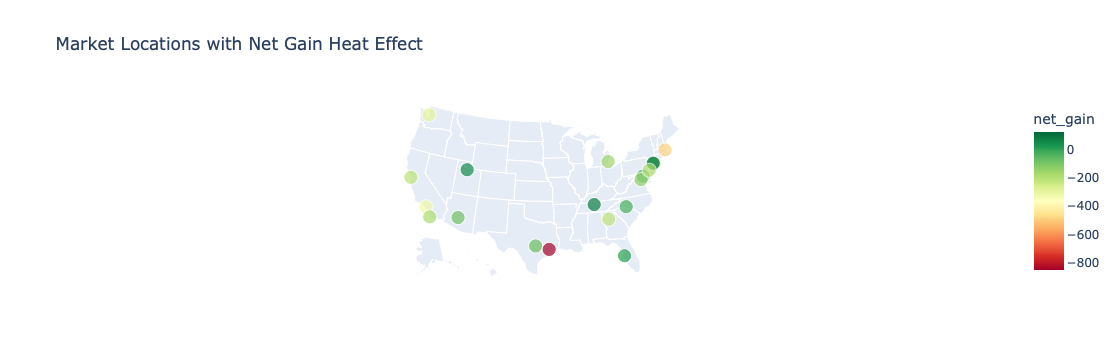

In [396]:


fig = px.scatter_geo(df2, 
                     lat='lat', lon='lon', 
                     size_max=10,  
                     size=[1] * len(df2), 
                     color='net_gain',  
                     hover_name='market', 
                     color_continuous_scale='RdYlGn',  
                     title="Market Locations with Net Gain Heat Effect")

fig.update_geos(projection_type="albers usa")

fig.show() 


In [400]:
leases.head() 

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,zip,internal_submarket,internal_class,leasedSF,company_name,internal_industry,transaction_type,internal_market_cluster,costarID,space_type,CBD_suburban,RBA,available_space,availability_proportion,internal_class_rent,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
0,2018,Q1,1.0,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,30328.0,Central Perimeter,A,24736.0,Capital Investment Advisors,Financial Services and Insurance,Expansion,NaN,445509,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
1,2018,Q1,1.0,Atlanta,100 City View,Atlanta_Northwest_Atlanta_100 City View_3330 C...,3330 Cumberland Blvd,South,Atlanta,GA,30339.0,Northwest,A,965.0,NaN,NaN,New,NaN,436994,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
2,2018,Q1,1.0,Atlanta,1000 Parkwood,Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...,1000 Parkwood Cir SE,South,Atlanta,GA,30339.0,Northwest,A,2215.0,Efc Moen,NaN,New,NaN,434890,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
3,2018,Q1,1.0,Atlanta,1100 Circle 75,Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...,1100 Circle 75 Pky SE,South,Atlanta,GA,30339.0,Northwest,O,1925.0,NaN,NaN,New,NaN,434720,Relet,Suburban,65810449.0,12728989.0,0.193419,18.560886,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742.0
4,2018,Q1,1.0,Atlanta,1200 Ashwood,Atlanta_Central Perimeter_Atlanta_1200 Ashwood...,1200 Ashwood Pky,South,Atlanta,GA,30338.0,Central Perimeter,A,2404.0,NaN,NaN,New,NaN,437562,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0


In [785]:
space = leases[['market', 'leasedSF', 'year']]
space

,market,leasedSF,year
0,Atlanta,24736.0,2018
1,Atlanta,965.0,2018
2,Atlanta,2215.0,2018
3,Atlanta,1925.0,2018
4,Atlanta,2404.0,2018
...,...,...,...
194680,Tampa,19654.0,2024
194681,Tampa,16224.0,2024
194682,Tampa,8475.0,2024
194683,Tampa,2014.0,2024


In [787]:
space.isna().sum() 

market      0
leasedSF    0
year        0
dtype: int64

In [789]:
space = space[space['year'] != 2018]
space = space[space['year'] != 2019]
space = space[space['year'] != 2020]
space = space[space['year'] != 2021] 

space 

,market,leasedSF,year
28129,Atlanta,751.0,2022
28130,Atlanta,1521.0,2022
28131,Atlanta,2710.0,2022
28132,Atlanta,780.0,2022
28133,Atlanta,5709.0,2022
...,...,...,...
194680,Tampa,19654.0,2024
194681,Tampa,16224.0,2024
194682,Tampa,8475.0,2024
194683,Tampa,2014.0,2024


In [799]:
def match_market(want): 
    market_matches = [] 

    grouped = space.groupby('market')['leasedSF'].mean()  

    for market, avg_leased_sf in grouped.items():
        
        size_difference = abs(avg_leased_sf - want) 

        market_matches.append((market, size_difference)) 

    market_matches.sort(key=lambda x: x[1])  

    return market_matches[:5] 


In [801]:
match_market(want = 5000)  

[('Tampa', 353.1227336122738),
 ('Denver', 367.4680279419663),
 ('Houston', 416.3687248556935),
 ('Phoenix', 478.6230647709317),
 ('San Diego', 485.8710907704044)]

In [815]:
price = leases[['market', 'overall_rent', 'year']]
price = price[price['year'] != 2018]
price = price[price['year'] != 2019]
price = price[price['year'] != 2020]
price = price[price['year'] != 2021] 
price = price.dropna(subset=['overall_rent']) 

price

,market,overall_rent,year
28129,Atlanta,30.697251,2022
28130,Atlanta,30.697251,2022
28131,Atlanta,30.697251,2022
28132,Atlanta,30.697251,2022
28133,Atlanta,30.697251,2022
...,...,...,...
194680,Tampa,29.460000,2024
194681,Tampa,29.460000,2024
194682,Tampa,29.460000,2024
194683,Tampa,29.460000,2024


In [817]:
price.isna().sum() 

market          0
overall_rent    0
year            0
dtype: int64

In [823]:
def match_market_price(want): 
    market_matches = [] 

    grouped = price.groupby('market')['overall_rent'].mean()  

    for market, avg_price_sf in grouped.items(): 
        
        price_difference = abs(avg_price_sf - want)  

        market_matches.append((market, price_difference)) 

    market_matches.sort(key=lambda x: x[1])  

    return market_matches[:5] 

In [845]:
match_market_price(20) 

[('Detroit', 0.9923393798074862),
 ('Baltimore', 4.117267882779085),
 ('Chicago Suburbs', 6.5867040459442485),
 ('Salt Lake City', 6.8750930860030905),
 ('Tampa', 8.786979808902178)]

In [873]:
def recommend_markets(want_space, want_price, weight_space=1.0, weight_price=1.0, top_n=5):
    
    space_matches = match_market(want_space)           
    price_matches = match_market_price(want_price)     

    combined_scores = {}
    for market, size_diff in space_matches:
        combined_scores.setdefault(market, 0.0)
        combined_scores[market] += weight_space * size_diff

    for market, price_diff in price_matches:
        combined_scores.setdefault(market, 0.0)
        combined_scores[market] += weight_price * price_diff

    ranked = sorted(combined_scores.items(), key=lambda x: x[1])

    top_markets = [f"{rank}. {market}" for rank, (market, _) in enumerate(ranked[:top_n], start=1)]
    return top_markets 


In [883]:
recommend_markets(5000, 30) 

['1. Northern New Jersey',
 '2. Philadelphia',
 '3. Tampa',
 '4. Denver',
 '5. Houston']

In [13]:
df = leases[['year', 'quarter', 'monthsigned', 'market', 'building_name', 'building_id', 'address', 'region', 
         'city', 'state', 'zip', 'internal_submarket', 'internal_class', 'leasedSF', 'company_name', 
         'internal_industry', 'transaction_type', 'internal_market_cluster', 'costarID', 'space_type', 
         'CBD_suburban', 'RBA', 'available_space', 'availability_proportion', 'internal_class_rent', 'overall_rent', 
         'direct_available_space', 'direct_availability_proportion', 'direct_internal_class_rent', 'direct_overall_rent', 
         'sublet_available_space', 'sublet_availability_proportion', 'sublet_internal_class_rent', 'sublet_overall_rent', 'leasing']]

In [15]:
# Clean/Aggregate/Period Index

df['year']    = pd.to_numeric(df['year'], errors='coerce')
df['quarter'] = (
    df['quarter']
      .astype(str)
      .str.extract(r'(\d)')
      .astype(float)
)
df = df.dropna(subset=['year', 'quarter'])
df['year']    = df['year'].astype(int)
df['quarter'] = df['quarter'].astype(int)
core = df[df.RBA.notna() | df.available_space.notna()].copy()
group_cols = ['market', 'internal_class', 'year']
for col in ['RBA', 'available_space', 'internal_class_rent', 'overall_rent']:
    med = core.groupby(group_cols)[col].transform('median')
    core[col] = core[col].fillna(med)
    core[col] = core[col].fillna(core.groupby(group_cols[:-1])[col].transform('median'))
agg = (
    core.groupby(['year', 'quarter', 'market', 'internal_class'])
        .agg(total_sf=('RBA', 'max'),
             vacant_sf=('available_space', 'max'),
             rent_usf=('internal_class_rent', 'mean'))
        .reset_index()
)
agg['vacancy_rate'] = agg.vacant_sf / agg.total_sf
quarter_end_month = agg['quarter'] * 3
agg['period'] = (
    pd.to_datetime(
        dict(year=agg['year'],
             month=quarter_end_month,
             day=1))
      .dt.to_period('Q')
)
agg = (
    agg.set_index('period')
       .sort_index()
       .drop(columns=['year', 'quarter'])
)
print("Rows in final agg:", len(agg))

Rows in final agg: 1176


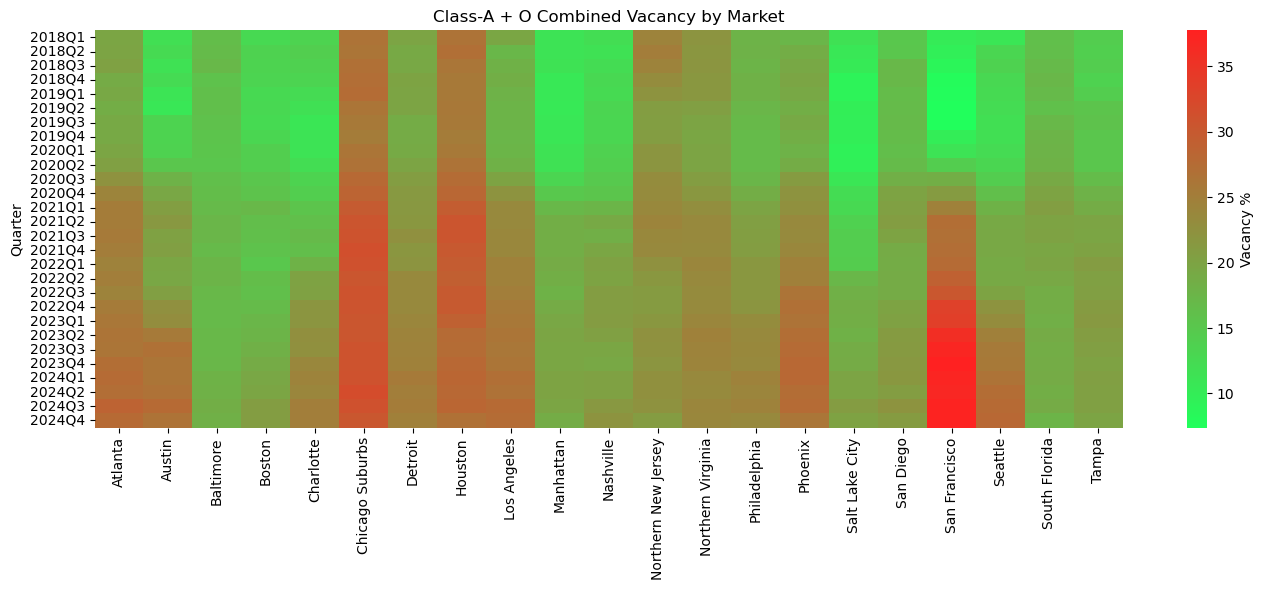

In [1050]:
import seaborn as sns, matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list('blue_orange', ['#21ff5c', '#ff2121'])

pivot = agg.pivot_table(
    index='period', columns='market', values='vacancy_rate', aggfunc='mean'
)
plt.figure(figsize=(14,6))
sns.heatmap(pivot*100, cmap=cmap, cbar_kws={'label':'Vacancy %'})
plt.title('Class-A + O Combined Vacancy by Market')
plt.ylabel('Quarter'); plt.xlabel('')
plt.tight_layout()
plt.show()


20:09:09 - cmdstanpy - INFO - Chain [1] start processing
20:09:09 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(
20:09:09 - cmdstanpy - INFO - Chain [1] start processing
20:09:09 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(
20:09:09 - cmdstanpy - INFO - Chain [1] start processing
20:09:10 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(
20:09:10 - cmdstanpy - INFO - Chain [1] start processing
20:09:10 - cmdst

Markets tightening (vacancy dropping):
Houston               -0.034664
Nashville             -0.022685
South Florida         -0.021786
Northern Virginia     -0.020820
Los Angeles           -0.006027
Northern New Jersey   -0.001047
Boston                -0.000256
Baltimore              0.007138
Detroit                0.016028
San Diego              0.016141
dtype: float64

Markets loosening (vacancy rising):
Seattle           0.017546
Philadelphia      0.023017
Atlanta           0.026434
Charlotte         0.029114
Tampa             0.033830
Manhattan         0.036009
Salt Lake City    0.049575
Austin            0.056739
Phoenix           0.067586
San Francisco     0.075935
dtype: float64


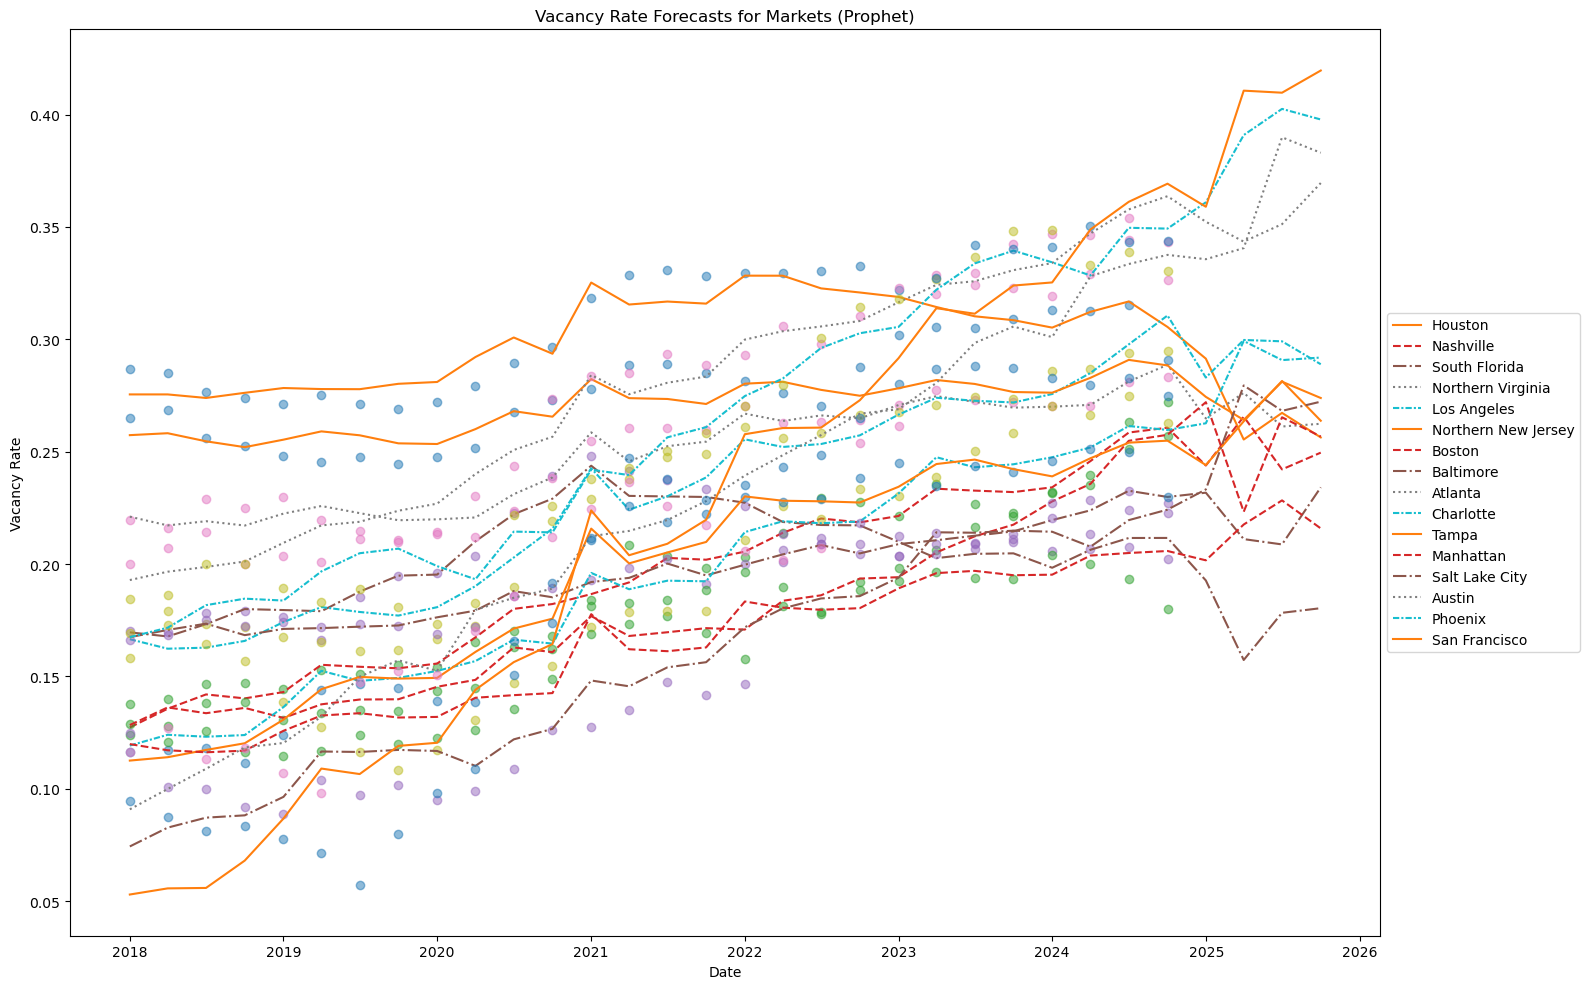

In [17]:
# Forecast future vacancy rates and visualize for top tightening/loosening markets using prophet

def forecast_series(df, market, iclass, horizon=4):
    s = df.loc[(df.market == market) & (df.internal_class == iclass), 'vacancy_rate']
    s = s.dropna()
    if s.empty:
        return None
    prophet_df = s.reset_index()
    prophet_df.columns = ['ds', 'y']
    prophet_df['ds'] = prophet_df['ds'].dt.to_timestamp()
    
    model = Prophet()
    model.fit(prophet_df)
    
    future = model.make_future_dataframe(periods=horizon, freq='Q')
    forecast = model.predict(future)
    
    return prophet_df, forecast

future = {}
history = {}
forecasted = {}
for m in agg['market'].unique():
    result = forecast_series(agg, m, 'A')
    if result is not None:
        history[m], forecasted[m] = result
        future[m] = forecasted[m]['yhat'].iloc[-1]
        
hist_last = (agg[agg['internal_class'] == 'A']
                 .groupby('market')['vacancy_rate']
                 .last())

delta = (pd.Series(future) - hist_last).sort_values()

print("Markets tightening (vacancy dropping):")
print(delta.head(10))
print("\nMarkets loosening (vacancy rising):")
print(delta.tail(10))

tightening_markets = delta.head(8).index.tolist()
loosening_markets = delta.tail(8).index.tolist()
top_markets = tightening_markets + loosening_markets

plt.figure(figsize=(16,10))

linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]

for i, market in enumerate(top_markets):
    if market not in history:
        continue  # skip if missing
    prophet_df = history[market] 
    forecast_df = forecasted[market]
    plt.plot(prophet_df['ds'], prophet_df['y'], 'o', alpha=0.5)
    plt.plot(forecast_df['ds'], forecast_df['yhat'], 
             linestyle=linestyles[i % len(linestyles)], 
             label=market) 

plt.title('Vacancy Rate Forecasts for Markets (Prophet)')
plt.ylabel('Vacancy Rate')
plt.xlabel('Date')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.savefig('forecast_top_markets.png', dpi=300, bbox_inches='tight')

plt.show()

In [19]:
final_yhat_values = {}

for market, forecast_df in forecasted.items():
    
    final_yhat = forecast_df.iloc[-1]['yhat']
    
    final_yhat_values[market] = final_yhat

for market, yhat_value in final_yhat_values.items():
    print(f"Market: {market} - Final Forecasted Vacancy Rate (yhat): {yhat_value}")


Market: Atlanta - Final Forecasted Vacancy Rate (yhat): 0.3695736167769115
Market: Austin - Final Forecasted Vacancy Rate (yhat): 0.3830522721382641
Market: Baltimore - Final Forecasted Vacancy Rate (yhat): 0.23410791474590165
Market: Boston - Final Forecasted Vacancy Rate (yhat): 0.25675462852921327
Market: Charlotte - Final Forecasted Vacancy Rate (yhat): 0.29189259187095007
Market: Chicago Suburbs - Final Forecasted Vacancy Rate (yhat): 0.35727444898912375
Market: Detroit - Final Forecasted Vacancy Rate (yhat): 0.27659628125287183
Market: Houston - Final Forecasted Vacancy Rate (yhat): 0.25634376020642935
Market: Los Angeles - Final Forecasted Vacancy Rate (yhat): 0.28891196086797555
Market: Manhattan - Final Forecasted Vacancy Rate (yhat): 0.21583768257842423
Market: Nashville - Final Forecasted Vacancy Rate (yhat): 0.24956801225649117
Market: Northern New Jersey - Final Forecasted Vacancy Rate (yhat): 0.27388661550827564
Market: Northern Virginia - Final Forecasted Vacancy Rate (y

In [21]:
final_vacancy = pd.DataFrame(list(final_yhat_values.items()), columns=['market', 'Final_Vacancy'])

final_vacancy 


,market,Final_Vacancy
0,Atlanta,0.369574
1,Austin,0.383052
2,Baltimore,0.234108
3,Boston,0.256755
4,Charlotte,0.291893
5,Chicago Suburbs,0.357274
6,Detroit,0.276596
7,Houston,0.256344
8,Los Angeles,0.288912
9,Manhattan,0.215838


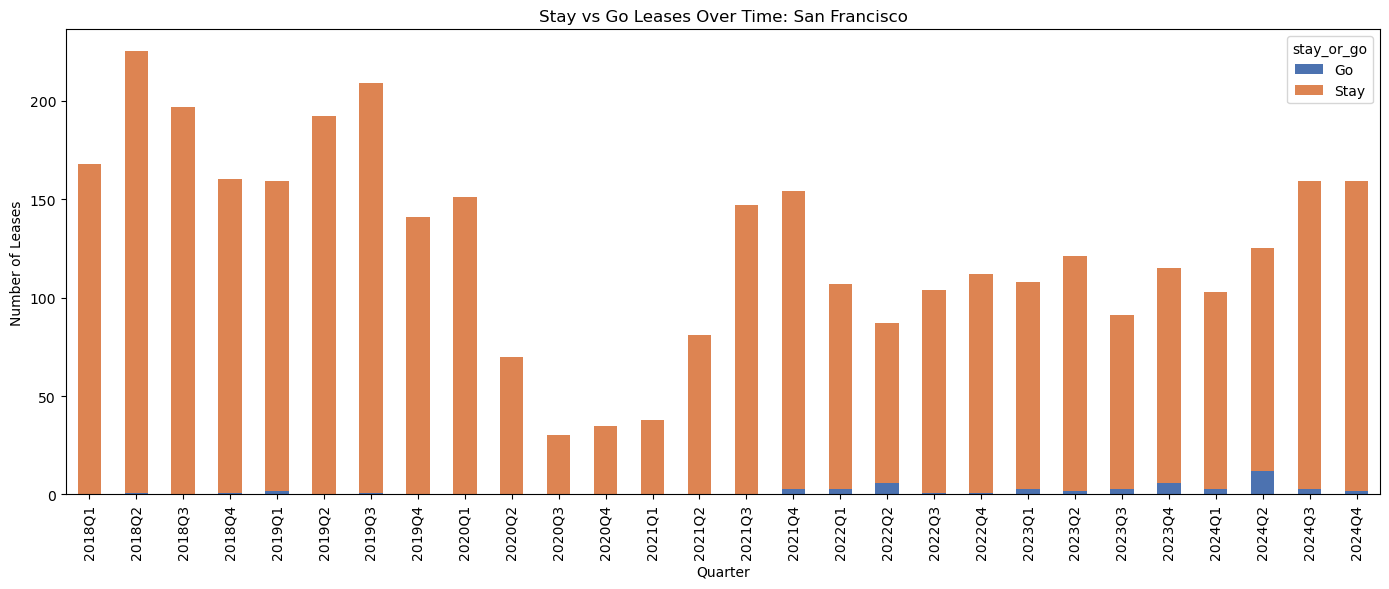

In [23]:
df['stay_or_go'] = df['transaction_type'].map({
    'Renewal': 'Stay',
    'Restructure': 'Stay',
    'Extension': 'Stay',
    'Sale - Leaseback': 'Stay',
    'Expansion': 'Stay',
    'New': 'Stay',
    'Renewal and Expansion': 'Stay',
    
    'Relocation': 'Go',
})

quarter_end_month = df['quarter'] * 3
df['period'] = pd.to_datetime({
    'year': df['year'],
    'month': quarter_end_month,
    'day': 1
}).dt.to_period('Q')

# 3. Drop rows with missing stay_or_go
staygo = df.dropna(subset=['stay_or_go'])

# 4. Group by period × market × stay/go
staygo_counts = (
    staygo.groupby(['period', 'market', 'stay_or_go'])
          .size()
          .unstack('stay_or_go', fill_value=0)
)

# 5. Plot for a specific market (e.g., 'Atlanta')
market = 'San Francisco'

staygo_market = staygo_counts.xs(market, level='market')
staygo_market.plot(kind='bar', stacked=True, figsize=(14,6),
                   color=['#4C72B0', '#DD8452'])  # Blue = Stay, Orange = Go
plt.title(f'Stay vs Go Leases Over Time: {market}')
plt.xlabel('Quarter')
plt.ylabel('Number of Leases')
plt.tight_layout()
plt.show()

20:10:02 - cmdstanpy - INFO - Chain [1] start processing
20:10:03 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(
20:10:03 - cmdstanpy - INFO - Chain [1] start processing
20:10:03 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(
20:10:03 - cmdstanpy - INFO - Chain [1] start processing
20:10:03 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(
20:10:03 - cmdstanpy - INFO - Chain [1] start processing
20:10:03 - cmdst

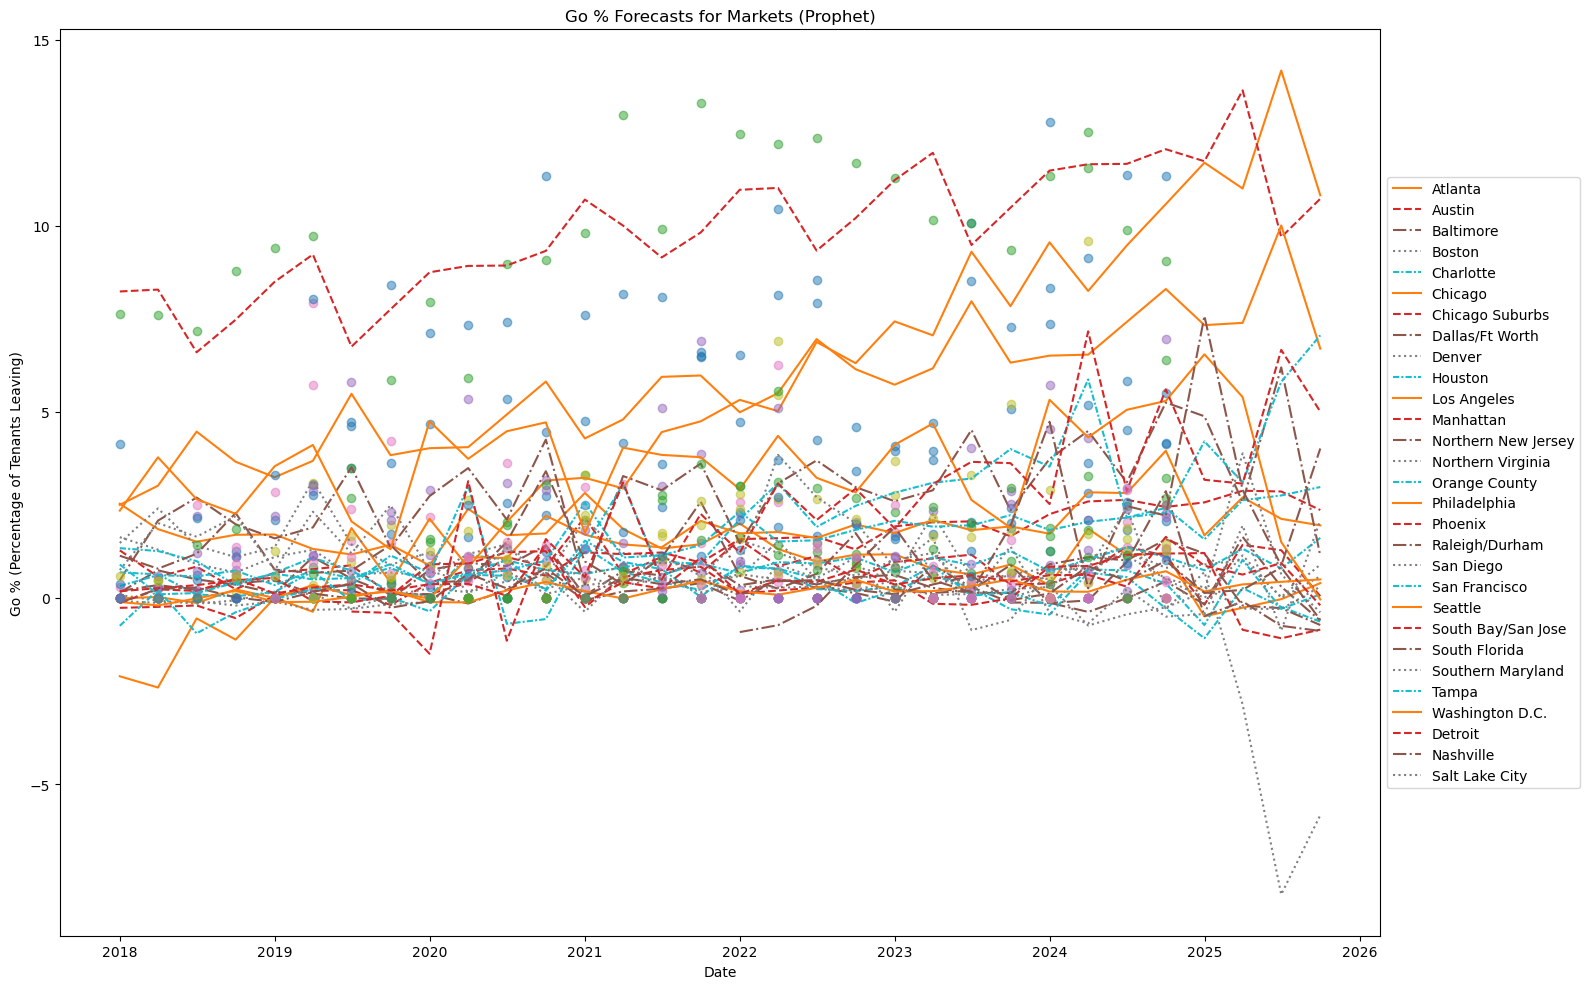

In [25]:
staygo_ratio = (
    staygo.groupby(['period', 'market', 'stay_or_go'])
          .size()
          .unstack('stay_or_go', fill_value=0)
)

staygo_ratio['go_pct'] = (staygo_ratio['Go'] / (staygo_ratio['Go'] + staygo_ratio['Stay'])) * 100

def forecast_go_pct(df, market, horizon=4):
    # Select just go_pct for this market
    s = df.xs(market, level='market')['go_pct']
    s = s.dropna()
    if s.empty:
        return None
    prophet_df = s.reset_index()
    prophet_df.columns = ['ds', 'y']
    prophet_df['ds'] = prophet_df['ds'].dt.to_timestamp()
    
    model = Prophet()
    model.fit(prophet_df)
    
    future = model.make_future_dataframe(periods=horizon, freq='Q')
    forecast = model.predict(future)
    
    return prophet_df, forecast


# 3. Forecast for each market
future = {}
history = {}
forecasted = {}

for m in staygo_ratio.index.get_level_values('market').unique():
    result = forecast_go_pct(staygo_ratio, m)
    if result is not None:
        history[m], forecasted[m] = result
        future[m] = forecasted[m]['yhat'].iloc[-1]

# 4. Plot the top markets (optional: you can define top/bottom here based on forecast)

plt.figure(figsize=(16,10))

linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]

top_markets = list(history.keys())  # or select specific ones if you want

for i, market in enumerate(top_markets):
    prophet_df = history[market]
    forecast_df = forecasted[market]
    plt.plot(prophet_df['ds'], prophet_df['y'], 'o', alpha=0.5)
    plt.plot(forecast_df['ds'], forecast_df['yhat'], 
             linestyle=linestyles[i % len(linestyles)], 
             label=market)

plt.title('Go % Forecasts for Markets (Prophet)')
plt.ylabel('Go % (Percentage of Tenants Leaving)')
plt.xlabel('Date')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.savefig('forecast_go_pct_top_markets.png', dpi=300, bbox_inches='tight')

plt.show()

In [31]:
final_yhat_values = {}

for market, forecast_df in forecasted.items():
    
    final_yhat = forecast_df.iloc[-1]['yhat']
    
    final_yhat_values[market] = final_yhat

for market, yhat_value in final_yhat_values.items():
    print(f"Market: {market} - Final Forecasted Vacancy Rate (yhat): {yhat_value}") 

Market: Atlanta - Final Forecasted Vacancy Rate (yhat): 0.3963286432441886
Market: Austin - Final Forecasted Vacancy Rate (yhat): 0.047553964923720216
Market: Baltimore - Final Forecasted Vacancy Rate (yhat): -0.6105843889295295
Market: Boston - Final Forecasted Vacancy Rate (yhat): 0.581220527707198
Market: Charlotte - Final Forecasted Vacancy Rate (yhat): -0.6380159826124774
Market: Chicago - Final Forecasted Vacancy Rate (yhat): 10.81691772760229
Market: Chicago Suburbs - Final Forecasted Vacancy Rate (yhat): 2.361758103145338
Market: Dallas/Ft Worth - Final Forecasted Vacancy Rate (yhat): -0.7275460787414101
Market: Denver - Final Forecasted Vacancy Rate (yhat): 0.8956198627309769
Market: Houston - Final Forecasted Vacancy Rate (yhat): 1.614313040158625
Market: Los Angeles - Final Forecasted Vacancy Rate (yhat): 1.9492218370002838
Market: Manhattan - Final Forecasted Vacancy Rate (yhat): 10.723239649174362
Market: Northern New Jersey - Final Forecasted Vacancy Rate (yhat): 1.134464

In [33]:
final_go = pd.DataFrame(list(final_yhat_values.items()), columns=['market', 'Final_Go'])

final_go

,market,Final_Go
0,Atlanta,0.396329
1,Austin,0.047554
2,Baltimore,-0.610584
3,Boston,0.581221
4,Charlotte,-0.638016
5,Chicago,10.816918
6,Chicago Suburbs,2.361758
7,Dallas/Ft Worth,-0.727546
8,Denver,0.895620
9,Houston,1.614313


In [35]:
merged_df = pd.merge(final_go, final_vacancy, on='market', how='inner')
merged_df 

,market,Final_Go,Final_Vacancy
0,Atlanta,0.396329,0.369574
1,Austin,0.047554,0.383052
2,Baltimore,-0.610584,0.234108
3,Boston,0.581221,0.256755
4,Charlotte,-0.638016,0.291893
5,Chicago Suburbs,2.361758,0.357274
6,Houston,1.614313,0.256344
7,Los Angeles,1.949222,0.288912
8,Manhattan,10.723240,0.215838
9,Northern New Jersey,1.134464,0.273887


In [37]:
df

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,zip,internal_submarket,internal_class,leasedSF,company_name,internal_industry,transaction_type,internal_market_cluster,costarID,space_type,CBD_suburban,RBA,available_space,availability_proportion,internal_class_rent,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing,stay_or_go,period
0,2018,1,1.0,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,30328.0,Central Perimeter,A,24736.0,Capital Investment Advisors,Financial Services and Insurance,Expansion,NaN,445509,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,Stay,2018Q1
1,2018,1,1.0,Atlanta,100 City View,Atlanta_Northwest_Atlanta_100 City View_3330 C...,3330 Cumberland Blvd,South,Atlanta,GA,30339.0,Northwest,A,965.0,NaN,NaN,New,NaN,436994,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,Stay,2018Q1
2,2018,1,1.0,Atlanta,1000 Parkwood,Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...,1000 Parkwood Cir SE,South,Atlanta,GA,30339.0,Northwest,A,2215.0,Efc Moen,NaN,New,NaN,434890,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,Stay,2018Q1
3,2018,1,1.0,Atlanta,1100 Circle 75,Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...,1100 Circle 75 Pky SE,South,Atlanta,GA,30339.0,Northwest,O,1925.0,NaN,NaN,New,NaN,434720,Relet,Suburban,65810449.0,12728989.0,0.193419,18.560886,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742.0,Stay,2018Q1
4,2018,1,1.0,Atlanta,1200 Ashwood,Atlanta_Central Perimeter_Atlanta_1200 Ashwood...,1200 Ashwood Pky,South,Atlanta,GA,30338.0,Central Perimeter,A,2404.0,NaN,NaN,New,NaN,437562,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,Stay,2018Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194680,2024,4,12.0,Tampa,Building II,Tampa_Westshore_Tampa_Building II_3111 W Dr Ma...,3111 W Dr Martin Luther King Blvd,South,Tampa,FL,33607.0,Westshore,A,19654.0,WGI,"Construction, Engineering and Architecture",Renewal and Expansion,Hillsborough,389404,NaN,Suburban,25106444.0,5772868.0,0.230000,32.980000,29.460000,4227315.0,0.0779,33.566518,29.801662,1545553.0,0.0285,26.162086,24.797899,770384.0,Stay,2024Q4
194681,2024,4,12.0,Tampa,Midtown East,Tampa_Westshore_Tampa_Midtown East_1 Midtown Pl,1 Midtown Pl,South,Tampa,FL,33607.0,Westshore,A,16224.0,Energy Insurance Mutual,NaN,Relocation,Hillsborough,612255,NaN,Suburban,25106444.0,5772868.0,0.230000,32.980000,29.460000,4227315.0,0.0779,33.566518,29.801662,1545553.0,0.0285,26.162086,24.797899,770384.0,Go,2024Q4
194682,2024,4,12.0,Tampa,Park Tower,Tampa_Tampa CBD_Tampa_Park Tower_400 N Tampa St,400 N Tampa St,South,Tampa,FL,33602.0,Tampa CBD,O,8475.0,The Florida Bar,Legal Services,New,Hillsborough,380519,Relet,CBD,29139850.0,4891754.0,0.168000,25.600000,29.460000,3967413.0,0.0731,25.777557,29.801662,924341.0,0.0170,22.768426,24.797899,328947.0,Stay,2024Q4
194683,2024,4,12.0,Tampa,Rivergate Tower,Tampa_Tampa CBD_Tampa_Rivergate Tower_400 N As...,400 N Ashley Dr,South,Tampa,FL,33602.0,Tampa CBD,A,2014.0,Four River Law Firm,Legal Services,Renewal,Hillsborough,380475,NaN,CBD,25106444.0,5772868.0,0.230000,32.980000,29.460000,4227315.0,0.0779,33.566518,29.801662,1545553.0,0.0285,26.162086,24.797899,770384.0,Stay,2024Q4


In [39]:
clust = df[['market', 'internal_industry']]
clust

,market,internal_industry
0,Atlanta,Financial Services and Insurance
1,Atlanta,NaN
2,Atlanta,NaN
3,Atlanta,NaN
4,Atlanta,NaN
...,...,...
194680,Tampa,"Construction, Engineering and Architecture"
194681,Tampa,NaN
194682,Tampa,Legal Services
194683,Tampa,Legal Services


In [41]:
clust = pd.merge(clust, merged_df, on='market', how='inner')
clust

,market,internal_industry,Final_Go,Final_Vacancy
0,Atlanta,Financial Services and Insurance,0.396329,0.369574
1,Atlanta,NaN,0.396329,0.369574
2,Atlanta,NaN,0.396329,0.369574
3,Atlanta,NaN,0.396329,0.369574
4,Atlanta,NaN,0.396329,0.369574
...,...,...,...,...
145539,Tampa,"Construction, Engineering and Architecture",2.979521,0.263766
145540,Tampa,NaN,2.979521,0.263766
145541,Tampa,Legal Services,2.979521,0.263766
145542,Tampa,Legal Services,2.979521,0.263766


In [43]:
clust['internal_industry'] = clust['internal_industry'].fillna('other') 
clust

,market,internal_industry,Final_Go,Final_Vacancy
0,Atlanta,Financial Services and Insurance,0.396329,0.369574
1,Atlanta,other,0.396329,0.369574
2,Atlanta,other,0.396329,0.369574
3,Atlanta,other,0.396329,0.369574
4,Atlanta,other,0.396329,0.369574
...,...,...,...,...
145539,Tampa,"Construction, Engineering and Architecture",2.979521,0.263766
145540,Tampa,other,2.979521,0.263766
145541,Tampa,Legal Services,2.979521,0.263766
145542,Tampa,Legal Services,2.979521,0.263766


In [45]:
clust = clust.dropna()

In [47]:
clust.isna().sum() 

market               0
internal_industry    0
Final_Go             0
Final_Vacancy        0
dtype: int64

In [49]:
clust

,market,internal_industry,Final_Go,Final_Vacancy
0,Atlanta,Financial Services and Insurance,0.396329,0.369574
1,Atlanta,other,0.396329,0.369574
2,Atlanta,other,0.396329,0.369574
3,Atlanta,other,0.396329,0.369574
4,Atlanta,other,0.396329,0.369574
...,...,...,...,...
145539,Tampa,"Construction, Engineering and Architecture",2.979521,0.263766
145540,Tampa,other,2.979521,0.263766
145541,Tampa,Legal Services,2.979521,0.263766
145542,Tampa,Legal Services,2.979521,0.263766


In [85]:


encoder = OneHotEncoder(categories='auto', sparse_output=False)

industry_encoded = encoder.fit_transform(clust[['internal_industry']])

industry_columns = encoder.get_feature_names_out(['internal_industry'])

industry_encoded_df = pd.DataFrame(industry_encoded, columns=industry_columns)

cluster = pd.concat([clust.drop('internal_industry', axis=1), industry_encoded_df], axis=1)

cluster.head()


,market,Final_Go,Final_Vacancy,"internal_industry_Agriculture, Forestry, Fishing, Metal & Mineral Mining",internal_industry_Associations and Non-profit Organizations (except Education and Non-profit Hospitals),"internal_industry_Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting","internal_industry_Construction, Engineering and Architecture",internal_industry_Coworking and Executive Suite Companies,internal_industry_Education,internal_industry_Energy & Utilities,internal_industry_Financial Services and Insurance,internal_industry_Government,internal_industry_Healthcare,internal_industry_Legal Services,"internal_industry_Manufacturing (except Pharmaceutical, Retail, and Computer Tech)",internal_industry_Personal Services and Recreation,internal_industry_Pharmaceuticals,internal_industry_Real Estate (except coworking providers),internal_industry_Retail,internal_industry_TBD,"internal_industry_Technology, Advertising, Media, and Information",internal_industry_Transportation,internal_industry_Unclassifiable,internal_industry_other
0,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
cluster = cluster.dropna()

In [61]:
cluster.isna().sum() 

market                                                                                                                   0
Final_Go                                                                                                                 0
Final_Vacancy                                                                                                            0
internal_industry_Agriculture, Forestry, Fishing, Metal & Mineral Mining                                                 0
internal_industry_Associations and Non-profit Organizations (except Education and Non-profit Hospitals)                  0
internal_industry_Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting    0
internal_industry_Construction, Engineering and Architecture                                                             0
internal_industry_Coworking and Executive Suite Companies                                                                0
internal_industr

In [63]:
cluster

,market,Final_Go,Final_Vacancy,"internal_industry_Agriculture, Forestry, Fishing, Metal & Mineral Mining",internal_industry_Associations and Non-profit Organizations (except Education and Non-profit Hospitals),"internal_industry_Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting","internal_industry_Construction, Engineering and Architecture",internal_industry_Coworking and Executive Suite Companies,internal_industry_Education,internal_industry_Energy & Utilities,internal_industry_Financial Services and Insurance,internal_industry_Government,internal_industry_Healthcare,internal_industry_Legal Services,"internal_industry_Manufacturing (except Pharmaceutical, Retail, and Computer Tech)",internal_industry_Personal Services and Recreation,internal_industry_Pharmaceuticals,internal_industry_Real Estate (except coworking providers),internal_industry_Retail,internal_industry_TBD,"internal_industry_Technology, Advertising, Media, and Information",internal_industry_Transportation,internal_industry_Unclassifiable,internal_industry_other
0,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145539,Tampa,2.979521,0.263766,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145540,Tampa,2.979521,0.263766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145541,Tampa,2.979521,0.263766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145542,Tampa,2.979521,0.263766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
clust_features = cluster.drop(columns=['market'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(clust_features)

cluster 


,market,Final_Go,Final_Vacancy,"internal_industry_Agriculture, Forestry, Fishing, Metal & Mineral Mining",internal_industry_Associations and Non-profit Organizations (except Education and Non-profit Hospitals),"internal_industry_Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting","internal_industry_Construction, Engineering and Architecture",internal_industry_Coworking and Executive Suite Companies,internal_industry_Education,internal_industry_Energy & Utilities,internal_industry_Financial Services and Insurance,internal_industry_Government,internal_industry_Healthcare,internal_industry_Legal Services,"internal_industry_Manufacturing (except Pharmaceutical, Retail, and Computer Tech)",internal_industry_Personal Services and Recreation,internal_industry_Pharmaceuticals,internal_industry_Real Estate (except coworking providers),internal_industry_Retail,internal_industry_TBD,"internal_industry_Technology, Advertising, Media, and Information",internal_industry_Transportation,internal_industry_Unclassifiable,internal_industry_other
0,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145539,Tampa,2.979521,0.263766,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145540,Tampa,2.979521,0.263766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145541,Tampa,2.979521,0.263766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145542,Tampa,2.979521,0.263766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
num_clusters = 21  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster['Cluster'] = kmeans.fit_predict(scaled_data)  

cluster 

,market,Final_Go,Final_Vacancy,"internal_industry_Agriculture, Forestry, Fishing, Metal & Mineral Mining",internal_industry_Associations and Non-profit Organizations (except Education and Non-profit Hospitals),"internal_industry_Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting","internal_industry_Construction, Engineering and Architecture",internal_industry_Coworking and Executive Suite Companies,internal_industry_Education,internal_industry_Energy & Utilities,internal_industry_Financial Services and Insurance,internal_industry_Government,internal_industry_Healthcare,internal_industry_Legal Services,"internal_industry_Manufacturing (except Pharmaceutical, Retail, and Computer Tech)",internal_industry_Personal Services and Recreation,internal_industry_Pharmaceuticals,internal_industry_Real Estate (except coworking providers),internal_industry_Retail,internal_industry_TBD,"internal_industry_Technology, Advertising, Media, and Information",internal_industry_Transportation,internal_industry_Unclassifiable,internal_industry_other,Cluster
0,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145539,Tampa,2.979521,0.263766,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
145540,Tampa,2.979521,0.263766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
145541,Tampa,2.979521,0.263766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
145542,Tampa,2.979521,0.263766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10


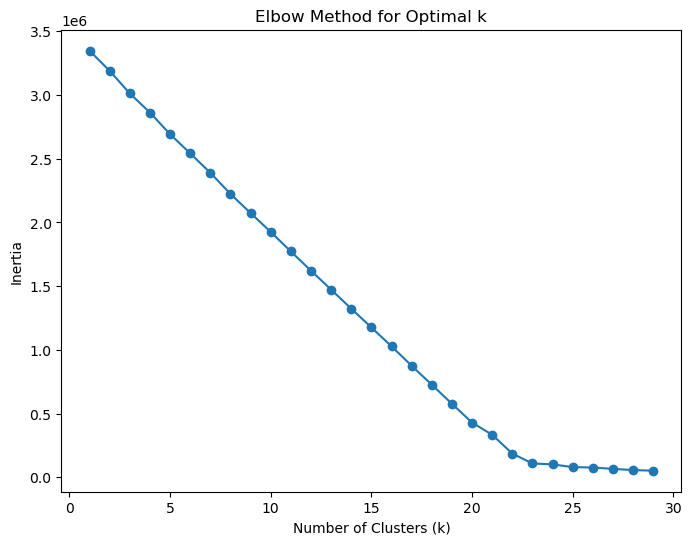

In [95]:
inertia = []

for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)  
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 30), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [1191]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_data)


pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2', 'PCA3'])

pca_df['Cluster'] = cluster['Cluster'].values  # Assuming 'Cluster' column exists


In [111]:
encoded_columns = [col for col in cluster.columns if col.startswith('internal_industry')]

cluster.loc[:, encoded_columns] = cluster[encoded_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

cluster['internal_industry'] = cluster[encoded_columns].idxmax(axis=1).apply(lambda x: x.replace('internal_industry_', '').strip())

cluster


,market,Final_Go,Final_Vacancy,"internal_industry_Agriculture, Forestry, Fishing, Metal & Mineral Mining",internal_industry_Associations and Non-profit Organizations (except Education and Non-profit Hospitals),"internal_industry_Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting","internal_industry_Construction, Engineering and Architecture",internal_industry_Coworking and Executive Suite Companies,internal_industry_Education,internal_industry_Energy & Utilities,internal_industry_Financial Services and Insurance,internal_industry_Government,internal_industry_Healthcare,internal_industry_Legal Services,"internal_industry_Manufacturing (except Pharmaceutical, Retail, and Computer Tech)",internal_industry_Personal Services and Recreation,internal_industry_Pharmaceuticals,internal_industry_Real Estate (except coworking providers),internal_industry_Retail,internal_industry_TBD,"internal_industry_Technology, Advertising, Media, and Information",internal_industry_Transportation,internal_industry_Unclassifiable,internal_industry_other,Cluster,internal_industry
0,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Financial Services and Insurance
1,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,other
2,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,other
3,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,other
4,Atlanta,0.396329,0.369574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145539,Tampa,2.979521,0.263766,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,"Construction, Engineering and Architecture"
145540,Tampa,2.979521,0.263766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,other
145541,Tampa,2.979521,0.263766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,Legal Services
145542,Tampa,2.979521,0.263766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,Legal Services


In [213]:

def recommend_location_with_clusters(industry_input, cluster, n_recommendations=5):
    """
    Recommender function to suggest top N markets for a given industry.
    Uses existing clusters to recommend markets based on the most industry occurrences
    and the lowest Final_Go and Final_Vacancy scores (the lower, the better). 

    Args:
        industry_input (str): The industry input by the user (e.g., 'Tech', 'Healthcare').
        cluster (DataFrame): The dataframe with clustering and relevant features.
        n_recommendations (int): Number of recommended locations to return.
    
    Returns:
        DataFrame: Top N recommended distinct markets based on the most industry occurrences and lowest scores.
    """
    
    # Filter the data to find rows that match the input industry
    industry_data = cluster[cluster['internal_industry'] == industry_input]
    
    # If no data for that industry, return empty
    if industry_data.empty:
        return "No data available for this industry."
    
    # Identify the cluster(s) for the input industry
    industry_clusters = industry_data['Cluster'].unique()
    
    # Filter the data to only include rows from those clusters
    similar_cluster_data = cluster[cluster['Cluster'].isin(industry_clusters)].copy()  # Create a copy to avoid warning
    
    # Count the occurrences of the input industry in each cluster
    industry_count_in_clusters = similar_cluster_data.groupby('Cluster')['internal_industry'].count()
    
    # Now, sort these clusters by industry count (most common industry first)
    sorted_clusters_by_industry = industry_count_in_clusters.sort_values(ascending=False).index
    
    # We will prioritize clusters with the most occurrences of the industry
    recommended_markets = []
    
    for cluster_id in sorted_clusters_by_industry:
        cluster_data = similar_cluster_data[similar_cluster_data['Cluster'] == cluster_id]
        
        # For the current cluster, find the minimum Final_Go and Final_Vacancy scores
        cluster_data['worst_score'] = cluster_data[['Final_Vacancy', 'Final_Go']].max(axis=1)
        
        # Sort the data by worst_score (lower is better)
        sorted_cluster_data = cluster_data.sort_values(by='worst_score', ascending=True)
        
        # Get the distinct markets from this cluster with the lowest scores
        unique_markets = sorted_cluster_data['market'].unique()
        
        # Add the markets to the recommendations list
        for market in unique_markets:
            if len(recommended_markets) < n_recommendations:
                recommended_markets.append(market)
            else:
                break  
            
        if len(recommended_markets) >= n_recommendations:
            break  
        
    recommended_markets_df = pd.DataFrame(recommended_markets, columns=['market'])
    
    return recommended_markets_df.head(n_recommendations)



In [215]:
industry_input = 'Financial Services and Insurance'
recommendations = recommend_location_with_clusters(industry_input, cluster, n_recommendations=5)

recommendations 

,market
0,South Florida
1,Baltimore
2,Northern Virginia
3,Salt Lake City
4,Charlotte


In [223]:
recos = leases[['market', 'overall_rent', 'leasedSF']] 
rec = recos[recos['market'].isin(recommendations['market'])]


In [247]:
market_value = 'Baltimore'

average_rent = rec[rec['market'] == market_value]['overall_rent'].mean()
average_area = rec[rec['market'] == market_value]['leasedSF'].mean()

average_rent
average_area

5409.410917361638

In [179]:

def find_best_matching_market(rec, desired_rent, desired_sf):
    """
    Recommender function to find the best market from the rec DataFrame
    based on the desired overall_rent and leasedSF, using the means of each market.
    
    Args:
        rec (DataFrame): The dataframe containing the market information, including overall_rent and leasedSF.
        desired_rent (float): The desired price per square foot (overall_rent).
        desired_sf (float): The desired leased square footage (leasedSF).
    
    Returns:
        str: The best market that aligns with the desired overall_rent and leasedSF.
    """
    
    market_means = rec.groupby('market')[['overall_rent', 'leasedSF']].mean()
    
    market_means['rent_diff'] = abs(market_means['overall_rent'] - desired_rent)
    market_means['sf_diff'] = abs(market_means['leasedSF'] - desired_sf)
    
    # Calculate a combined score for each market (sum of differences)
    market_means['total_diff'] = market_means['rent_diff'] + market_means['sf_diff']
    
    # Find the market with the lowest total difference
    best_match = market_means['total_diff'].idxmin()

    return best_match


In [249]:

desired_rent = 24
desired_sf = 5409


best_market = find_best_matching_market(rec, desired_rent, desired_sf)

print("Best matching market:", best_market)


Best matching market: Baltimore
